In [1]:
import molsysmt as msm
from molsysmt import pyunitwizard as puw
import omembrane as omem
import openmm as mm
from openmm import unit as u
import numpy as np
import math
from matplotlib import pyplot as plt
from tqdm import tqdm

from openmm import LocalEnergyMinimizer

In [2]:
molsys = msm.convert('memb_popc_100_stage_1.msmpk')

In [3]:
msm.info(molsys)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_waters,n_lipids,n_structures
molsysmt.MolSys,64168,12656,12656,3,12656,1,12456,200,1


/home/diego/Myopt/miniconda3/envs/OMembrane@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


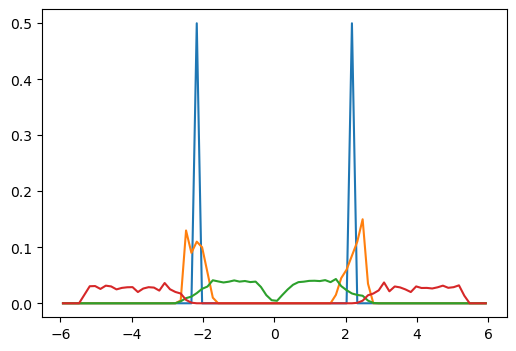

In [16]:
P_atoms = msm.select(molsys, selection='atom_type=="P" and molecule_type=="lipid"')
N_atoms = msm.select(molsys, selection='atom_type=="N" and molecule_type=="lipid"')
C_atoms = msm.select(molsys, selection='atom_type=="C" and molecule_type=="lipid"')
O_atoms = msm.select(molsys, selection='atom_type=="O" and molecule_type=="lipid"')
OW_atoms = msm.select(molsys, selection='atom_type=="O" and molecule_type=="water"')

bins_edges_P_init, density_P_init = omem.analysis.get_lineal_density(molsys, selection = P_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_N_init, density_N_init = omem.analysis.get_lineal_density(molsys, selection = N_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_C_init, density_C_init = omem.analysis.get_lineal_density(molsys, selection = C_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_O_init, density_O_init = omem.analysis.get_lineal_density(molsys, selection = O_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_OW_init, density_OW_init = omem.analysis.get_lineal_density(molsys, selection=OW_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)


plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_init[1:]+bins_edges_P_init[:-1])/2, density_P_init, label='P')
plt.plot((bins_edges_N_init[1:]+bins_edges_N_init[:-1])/2, density_N_init, label='N')
plt.plot((bins_edges_C_init[1:]+bins_edges_C_init[:-1])/2, density_C_init, label='C')
plt.plot((bins_edges_O_init[1:]+bins_edges_O_init[:-1])/2, density_O_init, label='O')
plt.plot((bins_edges_OW_init[1:]+bins_edges_OW_init[:-1])/2, density_OW_init, label='OW')
plt.show()

In [5]:
#msm.view(molsys, with_water_as='licorice')

In [6]:
context = msm.convert(molsys, 'openmm.Context', platform='CUDA')

In [7]:
state_init = context.getState(getPositions=True)

In [8]:
msm.molecular_mechanics.get_potential_energy(context)

6.236693663737446e+16 <Unit('kilojoule / mole')>

In [9]:
LocalEnergyMinimizer.minimize(context)

In [10]:
msm.molecular_mechanics.get_potential_energy(context)

-827327.75 <Unit('kilojoule / mole')>

In [11]:
state_end = context.getState(getPositions=True)

In [12]:
shifts_P = msm.structure.get_distances(molecular_system=state_init, molecular_system_2=state_end,
                                       selection=P_atoms, pairs=True, pbc=True)
shifts_N = msm.structure.get_distances(molecular_system=state_init, molecular_system_2=state_end,
                                       selection=N_atoms, pairs=True, pbc=True)
shifts_C = msm.structure.get_distances(molecular_system=state_init, molecular_system_2=state_end,
                                       selection=C_atoms, pairs=True, pbc=True)
shifts_OW = msm.structure.get_distances(molecular_system=state_init, molecular_system_2=state_end,
                                       selection=OW_atoms, pairs=True, pbc=True)

In [15]:
h_P, bins = np.histogram(puw.get_value(shifts_P[0]), range=[0.0, 1.0], bins=20, density=True)
h_N, bins = np.histogram(puw.get_value(shifts_N[0]), range=[0.0, 1.0], bins=20, density=True)
h_C, bins = np.histogram(puw.get_value(shifts_C[0]), range=[0.0, 1.0], bins=20, density=True)
h_OW, bins = np.histogram(puw.get_value(shifts_OW[0]), range=[0.0, 1.0], bins=20, density=True)
plt.plot(0.5*(bins[1:]+bins[:-1]), h_P, label='P')
plt.plot(0.5*(bins[1:]+bins[:-1]), h_N, label='N')
plt.plot(0.5*(bins[1:]+bins[:-1]), h_C, label='C')
plt.plot(0.5*(bins[1:]+bins[:-1]), h_OW, label='OW')
plt.show()

TypeError: histogram() got an unexpected keyword argument 'key'

In [ ]:
bins_edges_P_end, density_P_end = omem.analysis.get_lineal_density(state_end, selection = P_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_N_end, density_N_end = omem.analysis.get_lineal_density(state_end, selection = N_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)
bins_edges_C_end, density_C_end = omem.analysis.get_lineal_density(state_end, selection = C_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)

bins_edges_OW_end, density_OW_end = omem.analysis.get_lineal_density(state_end, selection=OW_atoms, axis = [0,0,1],
                                                       bins = 80, range="[-6.0, 6.0] nm", normalized=True)


plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges_P_end[1:]+bins_edges_P_end[:-1])/2, density_P_end)
plt.plot((bins_edges_N_end[1:]+bins_edges_N_end[:-1])/2, density_N_end)
plt.plot((bins_edges_C_end[1:]+bins_edges_C_end[:-1])/2, density_C_end)
plt.plot((bins_edges_OW_end[1:]+bins_edges_OW_end[:-1])/2, density_OW_end)
plt.show()

In [ ]:
forces = msm.molecular_mechanics.get_forces(context, norm=True)

In [ ]:
forces

In [ ]:
h, bins = np.histogram(puw.get_value(forces), bins=100, density=True)
plt.plot(0.5*(bins[1:]+bins[:-1]), h)
plt.show()

In [ ]:
memb_antes = msm.extract(molsys, selection='molecule_type=="lipid"', to_form='molsysmt.MolSys')
memb_despues = msm.extract([molsys, context], selection='molecule_type=="lipid"', to_form='molsysmt.MolSys')

In [ ]:
msm.view(memb_antes)

In [ ]:
msm.view(memb_despues)

In [ ]:
msm.view([molsys, context])